# Extract genes based on research, featureset 4, applying ExtraTreesClassifier

In [86]:
import pandas as pd
%run "..\Model\DataHelpers.ipynb"

print(f'Loading gene data - Start')
df = pd.read_csv('../Data/geneDataPreProcessed.csv')
print(f'Loading gene data - End')

Loading gene data - Start
Loading gene data - End


In [87]:
variant = FeatureVariant.RESEARCH_TREE
features = [    'A2M', 'ABCA1',  'ACKR1', 'ACSL3', 'ACTG2', 'ADH1B', 'ADH1C', 'AHR', 'AK5', 'AKT1', 'AKT2', 'AKT3', 
                'ALDH1A1', 'ALOX12B', 'AOC3', 'APOE', 'AR', 'ARID1B', 'ARNT', 'ASAH1', 'ASPSCR1', 'ASXL1', 
                'ASXL2', 'ASXL3', 'ATM', 'BCL9', 'BIRC3', 'BIRC6', 'BRCA1', 'BRCA2', 'BRD4', 'BTN3A1', 'CANT1', 'CCL4', 
                'CCND1', 'CCNE1', 'CCNT1', 'CD14', 'CTLA4', 'CD163', 'CD19', 'CD1A', 'CD1B', 'CD1C', 'CD1D', 'CD1E', 'CD24', 
                'CD27', 'CD274', 'CD276', 'CD3D', 'CD4', 'CD44', 'CD68', 'CD79A', 'CD86', 'CD8A', 'CD8B', 'CDH1', 
                'CDH2', 'CDH3', 'CDH5', 'CDK1', 'CDK2', 'CDK4', 'CDK6', 'CDKN1B', 'CDKN2A', 'CDKN2B', 'CEACAM7', 'CHAD',
                'CHEK2', 'CKB', 'CLEC3A', 'COL1A1', 'COL1A2', 'COPZ2', 'COX7A1', 'CREBBP', 'CRYAB', 'CSF2RB', 'CSMD3', 'CTLA4',
                'CTSD', 'CX3CR1', 'CXCL8', 'CXCR2', 'CXCR4', 'CYP1A1', 'DCLK1', 'DDR2', 'DDX3X', 'DEFB132', 'DNAH7', 'DNMT1', 
                'DNMT3A', 'DOCK11', 'DST', 'EDNRB', 'EGFR', 'EPCAM', 'ERBB2', 'ESR1', 'ESR2', 'EZH2', 'FAT1', 'FBXW7',
                'FCGR2B', 'FGA', 'FGB', 'FGFR1', 'FGFR2', 'FGFR4', 'FGG', 'FOXA1', 'FOXC1', 'FOXP3', 'FYN', 'GAS1', 'GATA3',
                'GIMAP7', 'GJA1', 'GJA4', 'GLDC', 'GNG11', 'GNLY', 'GPLD1', 'GPX4', 'GSTA2', 'GZMB', 'GZMB', 'HCLS1', 'HLA-E',
                'HSP90AA1', 'HSP90AB1', 'HSP90B1', 'HSPA5', 'ID4', 'IDO1', 'IFNG', 'IGF1', 'IL18', 'IL2RA', 'IL2RB',
                'IL2RG', 'IL6', 'IL7R', 'INMT', 'INPP4B', 'ITGAX', 'JCHAIN', 'KIT', 'KMT2D', 'KRT13', 'KRT14', 'KRT15', 'KRT18', 
                'KRT36', 'KRT5', 'KRT6A', 'KRT6B', 'KRT8', 'LAG3', 'LAMA2', 'LAMC2', 'LCP2', 'LMNA', 'LPA', 'LRPPRC', 
                'MAOA', 'MAP2K4', 'MAP3K1', 'MDGA2', 'MDM2', 'MET', 'MKI67', 'MS4A1', 'MSLN', 'MTOR', 'MUC1', 'MUC16', 'MYB',
                'MYC', 'NF1', 'NKG7', 'NME1', 'NOP16', 'NOTCH1', 'NOTCH2', 'NOTCH3', 'NOTCH4', 'NPR1', 'OBSCN', 'OGN', 'OLAH', 
                'P4HA3', 'PALB2', 'PCDH15', 'PCK1', 'PDCD1', 'PDCD1LG2', 'PDE2A', 'PDGFRA', 'PDGFRB', 'PECAM1', 'PGF', 'PGF',
                'PGR', 'PHLDA2', 'PIK3CA', 'PIK3R1', 'PIP', 'PKN1', 'PMS1', 'POSTN', 'PRKD2', 'PRR4', 'PTEN', 'PTK6', 'PTPRH', 
                'RACGAP1', 'RAD17', 'RAD51C', 'RB1', 'RDH12', 'RNF213', 'ROR1', 'RYR1', 'S100A16', 'SDS', 'SELL', 'SERPINA9', 
                'SNAI1', 'SNRNP200', 'SOD3', 'SPARCL1', 'SPTA1', 'SRC', 'SRD5A2', 'SREBF1', 'SRSF1', 'STAT1','STAT2', 
                'STAT3', 'STAT5A', 'SYNE1', 'TACSTD2', 'TAT', 'TBC1D1', 'TBC1D22B', 'TBC1D31', 'TBC1D7', 'TFF1', 'TGFB1', 
                'TGFB2', 'TGFB3', 'TH', 'THBD', 'TIGIT', 'TOP1', 'TOP2A', 'TP53', 'TRAP1', 'TRIM29', 'TTN', 'TYMS', 'UBE2C', 
                'USP6NL', 'VAV3', 'VEGFA', 'VEGFB', 'VEGFC', 'VEGFD', 'VIM', 'VRK1', 'VTCN1','VWF', 'WNT16', 'WTAP', 'XBP1', 
                 'XCL1', 'XCL2', 'YES1', 'YOD1' ]

### Dataset split: training and test data

In [88]:
X, y, X_train, X_test, y_train, y_test, test_case_ids = split_data(df[features+constTargetAndMetadata], "tnbc", True)
print("\nApplied Smote")
X_smote, y_smote, X_train_smote, X_test_smote, y_train_smote, y_test_smote, test_case_ids_smote = split_data_apply_smote(df[features+constTargetAndMetadata], "tnbc")

X_train.shape=(781, 284)
X_test.shape=(196, 284)
y_train.shape=(781,)
y_test.shape=(196,)

Applied Smote
X_train.shape=(1379, 284)
X_test.shape=(345, 284)
y_train.shape=(1379,)
y_test.shape=(345,)


# Apply Extra Trees Classifier

In [89]:
# Source: Artificial Intelligence with Python, 2nd edition. Packt Publishing Ltd, ISBN 978-1-83921-953-5.
# p. 70-71
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

### train n = 781, max features (n/p>5) = 156

In [90]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#extratreesclassifier
etc = ExtraTreesClassifier(n_estimators=100, max_depth=None, verbose=1, random_state=42)

print(f'ExtraTees - Start')
# find all relevant features
etc.fit(X_train, y_train)
print(f'ExtraTees - End')

# Features into outputset
feat_importances = pd.Series(etc.feature_importances_, index=X_train.columns)

ExtraTees - Start
ExtraTees - End


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


# Apply Extra Trees Classifier SMOTE
### SMOTE train n = 1379, max features (n/p>5) = 275

In [91]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#extratreesclassifier
etc_smote = ExtraTreesClassifier(n_estimators=100, max_depth=None, verbose=1, random_state=42)

print(f'ExtraTees - SMOTE - Start')
# find all relevant features
etc_smote.fit(X_train_smote, y_train_smote)
print(f'ExtraTees - SMOTE - End')

# Features into outputset
feat_importances_smote = pd.Series(etc_smote.feature_importances_, index=X_train_smote.columns)

ExtraTees - SMOTE - Start
ExtraTees - SMOTE - End


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


# Visualize classifier output SMOTE and nSMOTE
### To assess cutoff point

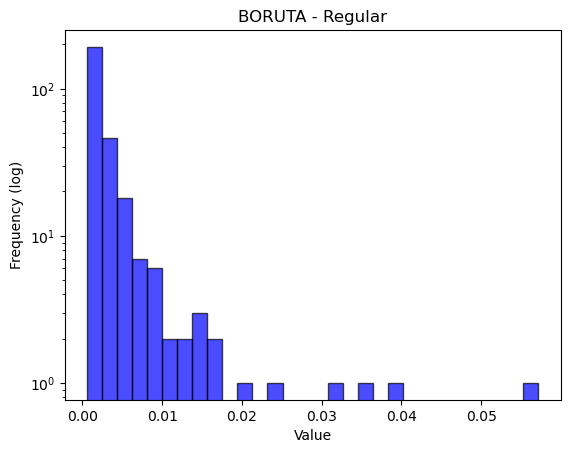

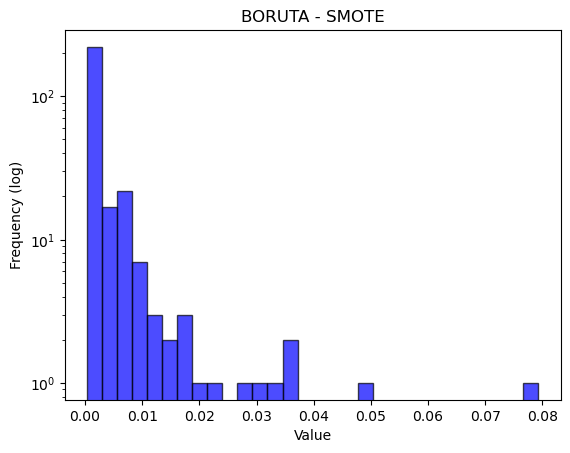

In [92]:
## Source: Artificial Intelligence with Python, 2nd edition. Packt Publishing Ltd, ISBN 978-1-83921-953-5.
# p. 70-71
plt.hist(feat_importances, bins=30, color='blue', edgecolor='black', alpha=0.7)

plt.title('BORUTA - Regular')
plt.xlabel('Value')
plt.yscale('log')
plt.ylabel('Frequency (log)')
plt.show()

plt.hist(feat_importances_smote, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('BORUTA - SMOTE')
plt.xlabel('Value')
plt.yscale('log')
plt.ylabel('Frequency (log)')
plt.show()

# Convert ExtraTree output to Features Lists (SMOTE and nSMOTE)

In [93]:
#feat_importances
feat_importances_regular, feat_importances_regular_i   = pd.qcut(x=feat_importances      , q=4, retbins=True)
feat_importances_smote_smote, feat_importances_smote_i = pd.qcut(x=feat_importances_smote, q=4, retbins=True)

feat_importances_regular_q4 = feat_importances[feat_importances >= feat_importances_regular_i[3]]
feat_importances_smote_q4   = feat_importances_smote[feat_importances_smote >= feat_importances_smote_i[3]]

featureList = feat_importances_regular_q4.index.tolist()
smoteFeatureList = feat_importances_smote_q4.index.tolist()

print('Featurelist nSMOTE: '+ str(len(featureList)))
print('Featurelist SMOTE: ' + str(len(smoteFeatureList)))

Featurelist nSMOTE: 71
Featurelist SMOTE: 71


In [95]:
# From documentation:
# The higher, the more important the feature. 
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature.
# It is also known as the Gini importance.

# Given histograms above, 0.005 is the cutoff
featureList = feat_importances[feat_importances >= 0.005].index.tolist()
smoteFeatureList = feat_importances_smote[feat_importances_smote >= 0.005].index.tolist()

# Send dataframe to a csv

In [96]:
df[featureList+constTargetAndMetadata].to_csv(f'../Data/patient_genes_{variant}.csv', index=False)
df[smoteFeatureList+constTargetAndMetadata].to_csv(f'../Data/patient_genes_{variant}_smote.csv', index=False)